In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
real = pd.read_csv('Desktop/real_estateUC.csv')
real.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
real = real.drop(['No'], axis=1)
real.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


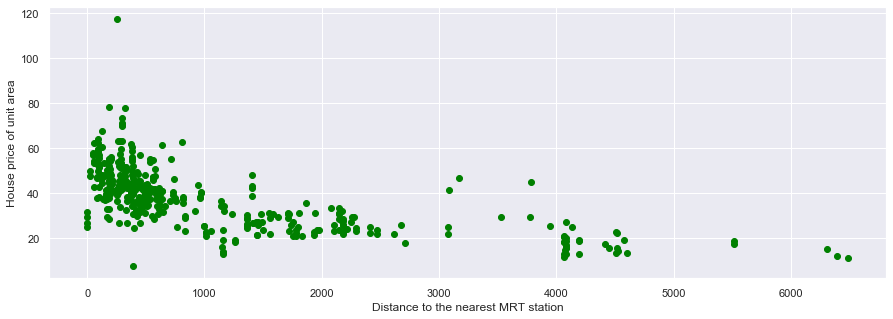

In [4]:
plt.figure(figsize = (15,5))
plt.scatter(real['X3 distance to the nearest MRT station'], real['Y house price of unit area'], c = 'green')
plt.xlabel ("Distance to the nearest MRT station")
plt.ylabel("House price of unit area")
plt.show()
#Price of a house is depending on many factors including Dist from Stn & No. of Convinience Stores
#As with Distance to Stn increases so Dist is independent and house price is dependent.

In [6]:
x = real ['X3 distance to the nearest MRT station'].values.reshape(-1,1)
y = real ['Y house price of unit area'].values.reshape(-1,1)

In [7]:
x

array([[  84.87882],
       [ 306.5947 ],
       [ 561.9845 ],
       [ 561.9845 ],
       [ 390.5684 ],
       [2175.03   ],
       [ 623.4731 ],
       [ 287.6025 ],
       [5512.038  ],
       [1783.18   ],
       [ 405.2134 ],
       [  90.45606],
       [ 492.2313 ],
       [2469.645  ],
       [1164.838  ],
       [ 579.2083 ],
       [ 292.9978 ],
       [ 350.8515 ],
       [ 368.1363 ],
       [  23.38284],
       [2275.877  ],
       [ 279.1726 ],
       [1360.139  ],
       [ 279.1726 ],
       [ 480.6977 ],
       [1487.868  ],
       [ 383.8624 ],
       [ 276.449  ],
       [ 557.478  ],
       [ 451.2438 ],
       [4519.69   ],
       [ 769.4034 ],
       [ 488.5727 ],
       [ 323.655  ],
       [ 205.367  ],
       [4079.418  ],
       [1935.009  ],
       [1360.139  ],
       [ 577.9615 ],
       [ 289.3248 ],
       [4082.015  ],
       [4066.587  ],
       [ 519.4617 ],
       [ 512.7871 ],
       [ 533.4762 ],
       [ 488.8193 ],
       [ 463.9623 ],
       [ 640.

In [8]:
y

array([[ 37.9],
       [ 42.2],
       [ 47.3],
       [ 54.8],
       [ 43.1],
       [ 32.1],
       [ 40.3],
       [ 46.7],
       [ 18.8],
       [ 22.1],
       [ 41.4],
       [ 58.1],
       [ 39.3],
       [ 23.8],
       [ 34.3],
       [ 50.5],
       [ 70.1],
       [ 37.4],
       [ 42.3],
       [ 47.7],
       [ 29.3],
       [ 51.6],
       [ 24.6],
       [ 47.9],
       [ 38.8],
       [ 27. ],
       [ 56.2],
       [ 33.6],
       [ 47. ],
       [ 57.1],
       [ 22.1],
       [ 25. ],
       [ 34.2],
       [ 49.3],
       [ 55.1],
       [ 27.3],
       [ 22.9],
       [ 25.3],
       [ 47.7],
       [ 46.2],
       [ 15.9],
       [ 18.2],
       [ 34.7],
       [ 34.1],
       [ 53.9],
       [ 38.3],
       [ 42. ],
       [ 61.5],
       [ 13.4],
       [ 13.2],
       [ 44.2],
       [ 20.7],
       [ 27. ],
       [ 38.9],
       [ 51.7],
       [ 13.7],
       [ 41.9],
       [ 53.5],
       [ 22.6],
       [ 42.4],
       [ 21.3],
       [ 63.2],
       [

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)
#30% test & 70% train

In [11]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(289, 1)
(125, 1)
(289, 1)
(125, 1)


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

-0.007239119398669085
46.24531036570704


In [15]:
print("The model is: X3 distance to the nearest MRT station = {:.5} + {:.5}(Y house price of unit area)".format(reg.intercept_[0], reg.coef_[0][0]))

The model is: X3 distance to the nearest MRT station = 46.245 + -0.0072391(Y house price of unit area)


In [16]:
predictions = reg.predict(x_test)

In [17]:
estate = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicitions' : predictions.flatten()})

In [18]:
estate.head()

,Actual,Predicitions
0,45.3,44.714618
1,14.4,13.468844
2,46.0,43.893017
3,15.6,13.526735
4,50.2,45.014803


<function matplotlib.pyplot.show(*args, **kw)>

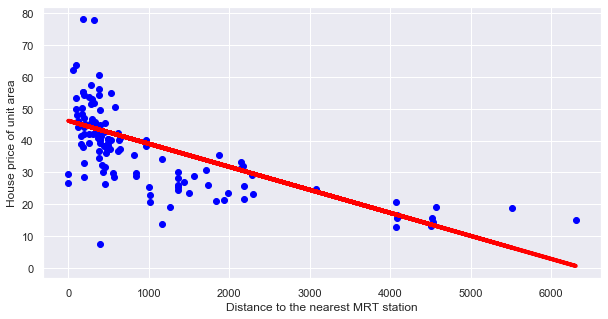

In [20]:
plt.figure(figsize = (10,5))
plt.scatter(x_test, y_test, c = 'blue')
plt.plot(x_test, predictions, c = 'red', linewidth = 4)
plt.xlabel ("Distance to the nearest MRT station")
plt.ylabel("House price of unit area")
plt.show

In [21]:
from sklearn import metrics

In [23]:
metrics.mean_squared_error (y_test, predictions)

98.63974217945851

In [24]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

9.931754234749192

In [25]:
from sklearn.metrics import r2_score

In [26]:
coefficient_of_dermination = r2_score(y_test, predictions)

In [27]:
coefficient_of_dermination

0.42121055408497254

In [28]:
import statsmodels.api as sm

In [29]:
X= real['X3 distance to the nearest MRT station']
Y= real['Y house price of unit area']


In [30]:
X2= sm.add_constant(X)
X2

,const,X3 distance to the nearest MRT station
0,1.0,84.87882
1,1.0,306.59470
2,1.0,561.98450
3,1.0,561.98450
4,1.0,390.56840
...,...,...
409,1.0,4082.01500
410,1.0,90.45606
411,1.0,390.96960
412,1.0,104.81010


In [31]:
sm_reg = sm.OLS(Y, X2)
sm_fit = sm_reg.fit()
print(sm_fit.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.440
Model:                                    OLS   Adj. R-squared:                  0.439
Method:                         Least Squares   F-statistic:                     323.7
Date:                        Mon, 31 Aug 2020   Prob (F-statistic):           7.95e-54
Time:                                23:34:59   Log-Likelihood:                -1547.7
No. Observations:                         414   AIC:                             3099.
Df Residuals:                             412   BIC:                             3107.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [32]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [33]:
from yellowbrick.regressor import ResidualsPlot

C:\Users\Raja\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


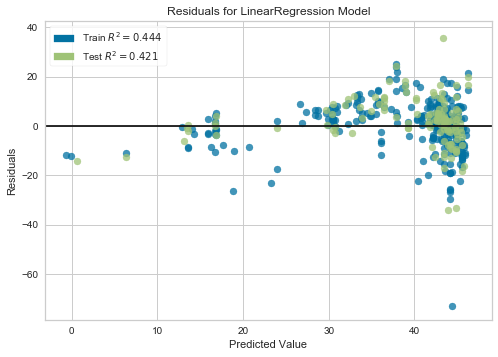

In [34]:
visualizer = ResidualsPlot(reg, hist=False)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

In [35]:
from sklearn.linear_model import Ridge

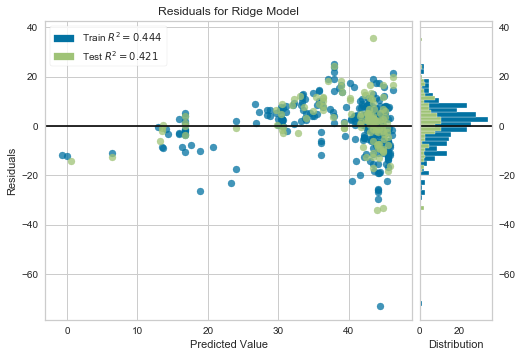

In [36]:
reg = Ridge()
visualizer = ResidualsPlot(reg)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
visualizer.show()

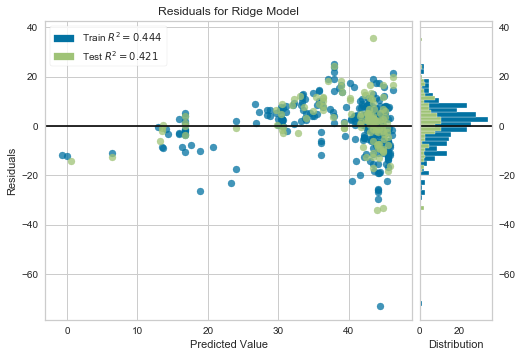

In [37]:
reg = ResidualsPlot(Ridge())
reg.fit(x_train, y_train)
reg.score(x_test, y_test)
reg.show()

In [38]:
real.shape

(414, 7)

In [40]:
real.describe

<bound method NDFrame.describe of      X1 transaction date  X2 house age  \
0               2012.917          32.0   
1               2012.917          19.5   
2               2013.583          13.3   
3               2013.500          13.3   
4               2012.833           5.0   
..                   ...           ...   
409             2013.000          13.7   
410             2012.667           5.6   
411             2013.250          18.8   
412             2013.000           8.1   
413             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                  

In [42]:
real.loc[4:25, ('X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'Y house price of unit area')]

,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
4,390.56840,5,43.1
5,2175.03000,3,32.1
6,623.47310,7,40.3
7,287.60250,6,46.7
8,5512.03800,1,18.8
9,1783.18000,3,22.1
10,405.21340,1,41.4
11,90.45606,9,58.1
12,492.23130,5,39.3
13,2469.64500,4,23.8


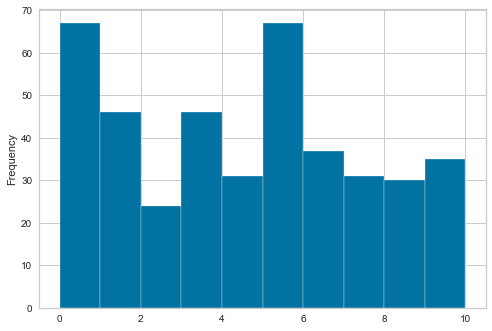

In [43]:
real['X4 number of convenience stores'].plot(kind='hist')

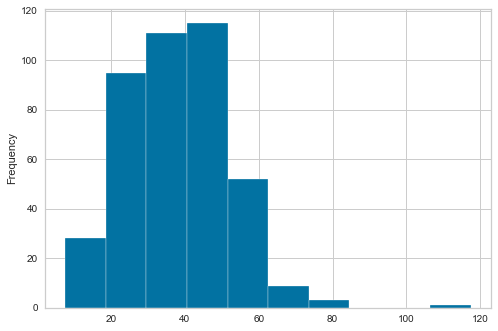

In [44]:
real['Y house price of unit area'].plot(kind='hist')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


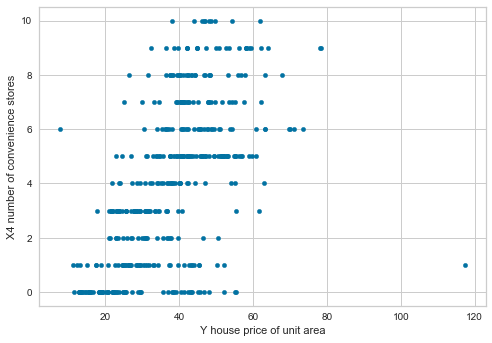

In [45]:
real.plot(kind='scatter', x= 'Y house price of unit area', y= 'X4 number of convenience stores')

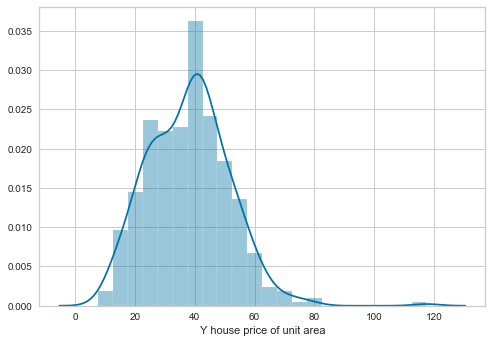

In [46]:
sns.distplot(real['Y house price of unit area'])

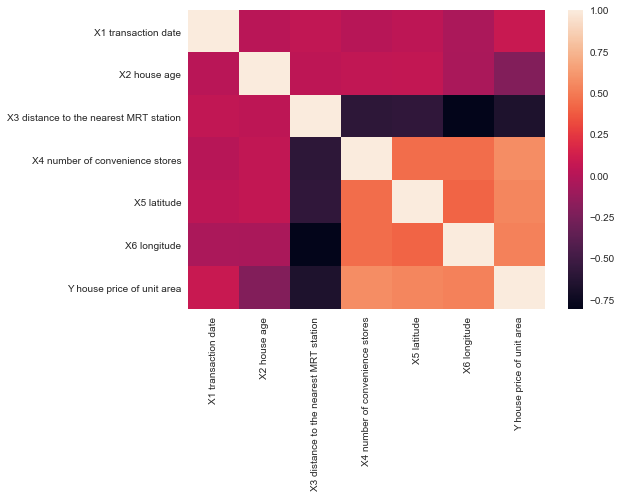

In [47]:
sns.heatmap(real.corr())

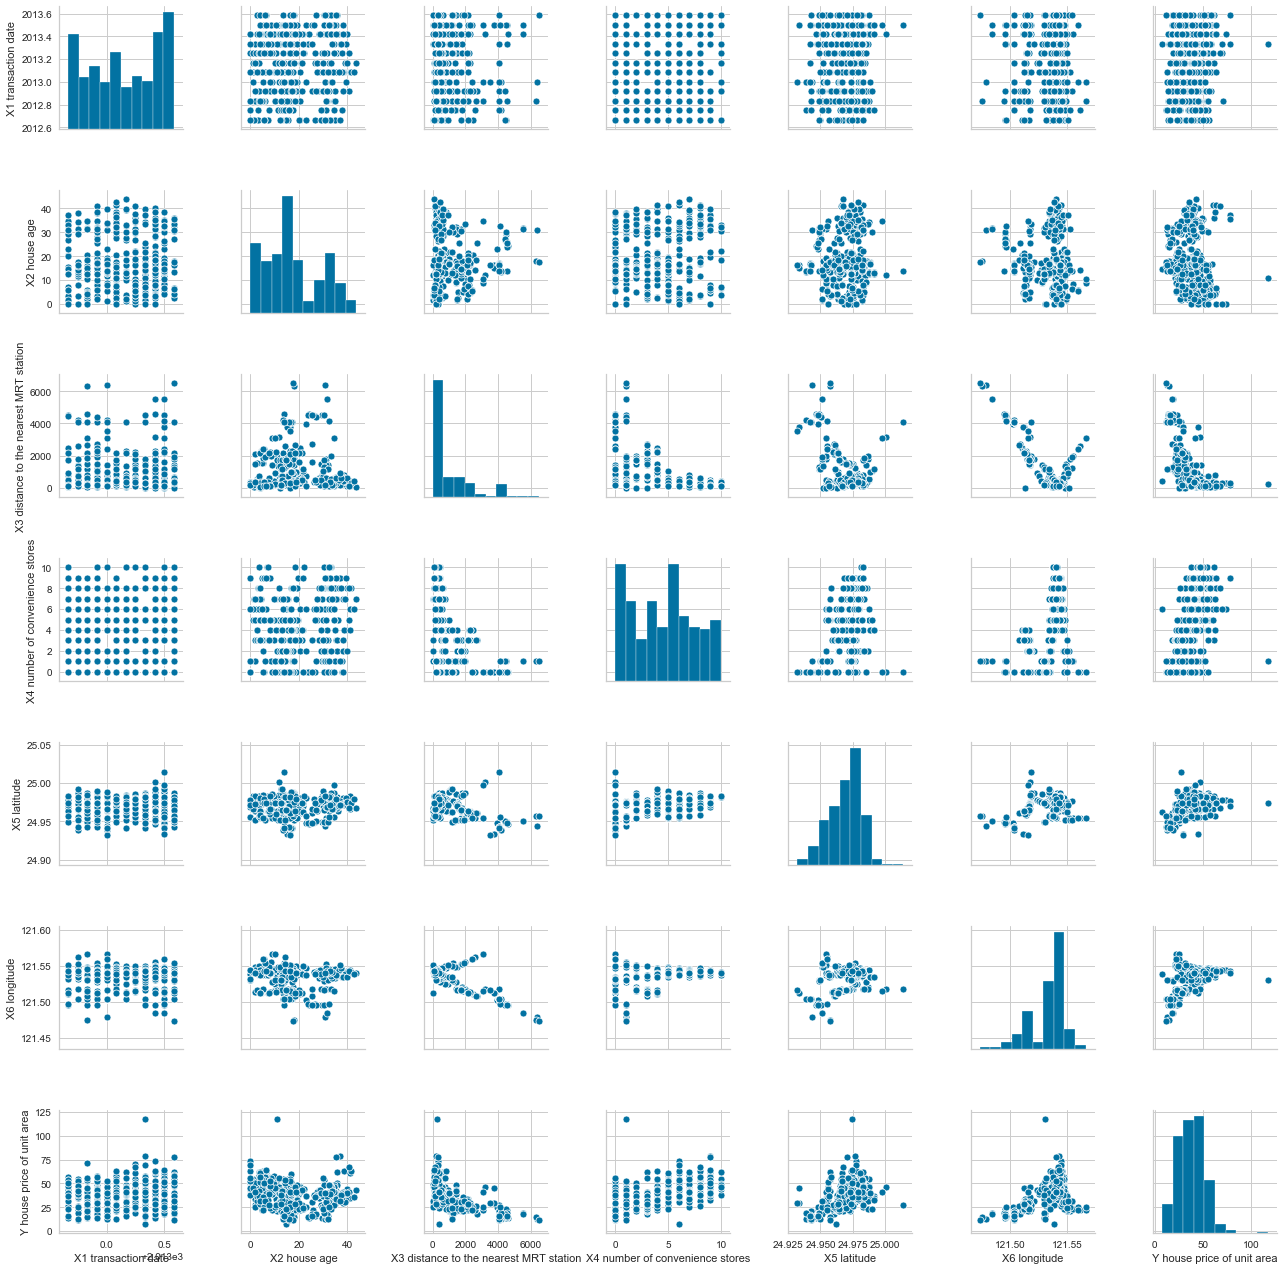

In [48]:
sns.pairplot(real)